In [18]:
# Import the required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans

### Step 1: Read in the `customer-shopping-scaled.csv` file and create the DataFrame. Review the resulting DataFrame. Additionally, check the data types associated with the DataFrame.

In [19]:
# Read in the CSV file and create the Pandas DataFrame
customers_df = pd.read_csv("Resources/customer-shopping-scaled.csv")

# Review the DataFrame
customers_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Method
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,Retail
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,Retail
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,Retail
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,HotelRestCafe
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,Retail


In [21]:
customers_df.Method.value_counts()

Method
HotelRestCafe    298
Retail           142
Name: count, dtype: int64

In [20]:
# Check for null values and the data types. 
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fresh             440 non-null    float64
 1   Milk              440 non-null    float64
 2   Grocery           440 non-null    float64
 3   Frozen            440 non-null    float64
 4   Detergents_Paper  440 non-null    float64
 5   Delicassen        440 non-null    float64
 6   Method            440 non-null    object 
dtypes: float64(6), object(1)
memory usage: 24.2+ KB


### Step 2: Use the `encodeMethod` function that sets the `purchase` variable to 1 for "HotRestCafe" (hotel/restaurant/cafe ) purchases, and 2 for "retail" purchases.

In [22]:
# Build the encodeMethod helper function
# Hotel/Restuarant/Cafe purchases should encode to 1
# Retail purchases should encode to 2
def encodeMethod(purchase):
    """
    This function encodes the method of purchases to 2 for "Retail"
    and 1 for Hotel/Restuarant/Cafe.
    """
    if purchase == "HotelRestCafe":
        return 1
    else:
        return 2

### Step 3: Edit the "Method" column in the DataFrame by applying the `encodeMethod` function. 

In [23]:
# Edit the "Method" column using the encodeMethod function
customers_df["Method"] = customers_df["Method"].apply(encodeMethod)

# # Review the DataFrame
customers_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Method
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,2


### Step 4: Using this encoded DataFrame, initialize two K-means models: one with two clusters and another with three. For each model, be sure to follow each of the steps needed to identify the clusters and assign them to the data. 

* Initialize the KMeans model instance.
* Fit, or train, the model.
* Predict the model segments(clusters).

### Train the K-means algorithm where k=2

In [6]:
# Initialize the K-Means model; n_clusters=2 and n_init='auto'
model_k2 = KMeans(n_clusters=2, n_init='auto')

In [7]:
# Fit the model
model_k2.fit(customers_df)

KMeans(n_clusters=2)

In [24]:
# Predict the model segments (clusters)
customer_segments_k2 = model_k2.predict(customers_df)

# View the customer segments
print(customer_segments_k2)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


### Train the K-means algorithm where k=3

In [25]:
# Initialize the K-Means model; n_clusters=3 and n_init='auto'
model_k3 = KMeans(n_clusters=3, n_init='auto')

In [26]:
# Fit the model
model_k3.fit(customers_df)

KMeans(n_clusters=3)

In [27]:
# Predict the model segments (clusters)
customer_segments_k3 = model_k3.predict(customers_df)

# View the customer segments
print(customer_segments_k3)

[1 1 1 1 0 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 1 0 2 0 1 1 1 2 0 1 1 1 0 1 1 0
 2 2 0 0 1 2 2 1 2 2 2 1 2 1 1 0 1 1 1 2 2 1 1 1 2 1 2 1 2 1 1 1 1 0 0 1 1
 1 1 1 2 1 1 1 2 1 1 1 2 2 0 1 1 1 1 2 0 1 1 1 1 1 1 2 2 1 0 1 1 1 2 1 2 1
 2 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 1
 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 2 1 2 1 1 1 1 2 2 1 2 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 2 1 1 0 1 1 1 2 2 0 1 1 2 1 1 1 2 1 2 1 1 1 2 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 0
 0 1 1 1 1 2 2 2 1 2 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 2 1 1
 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 2 1
 2 0 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 2 1 1 1 1 1 0 1 1 2 1 2 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 2 1 1]


### Step 5: Once the models have been run, add each of the customer segment lists back into the `customers_df` DataFrame as new columns. 

In [28]:
# Create a copy of the original DataFrame and name it as customer_predictions
customer_predictions = customers_df.copy()

In [29]:
# Create a new column in the DataFrame with the predicted clusters with k=2
customer_predictions["Customer Segment (k=2)"] = customer_segments_k2

In [30]:
# Create a new column in the DataFrame with the predicted clusters with k=3
customer_predictions["Customer Segment (k=3)"] = customer_segments_k3

In [31]:
# Review the DataFrame
customer_predictions.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Method,Customer Segment (k=2),Customer Segment (k=3)
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,2,0,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,2,0,1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,2,0,1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1,0,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,2,0,0


### Step 6: Using Pandas plot, create scatter plots for each of the two customer segments. Be sure to build styled and formatted plots.

<Axes: title={'center': 'Scatter Plot by Shopping Segment - k=2'}, xlabel='Frozen', ylabel='Grocery'>

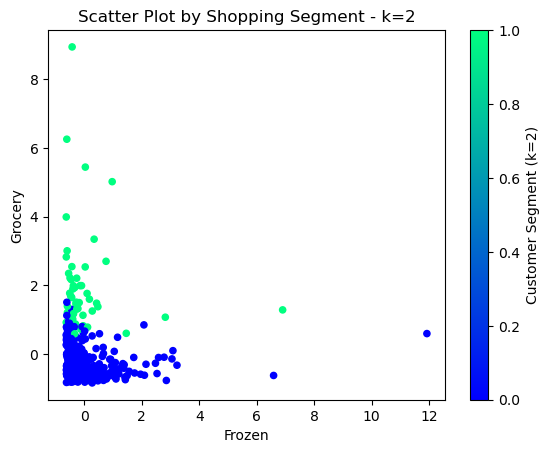

In [32]:
# Create a scatter plot with x="Frozen" and y="Grocery" with k=2 segments
customer_predictions.plot.scatter(
    x="Frozen", 
    y="Grocery", 
    c="Customer Segment (k=2)",
    title = "Scatter Plot by Shopping Segment - k=2",
    colormap='winter'
)

<Axes: title={'center': 'Scatter Plot by Shopping Segment - k=3'}, xlabel='Frozen', ylabel='Grocery'>

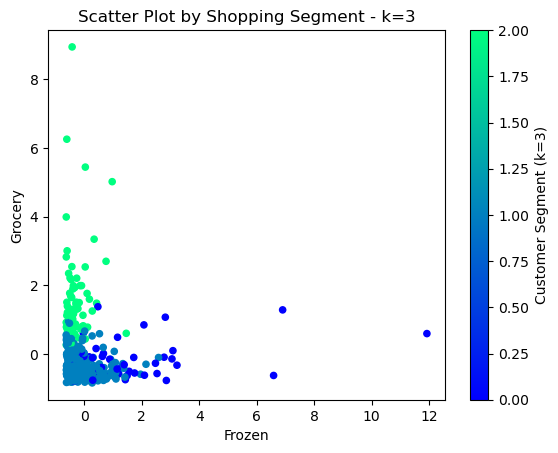

In [33]:
# Create a scatter plot with x="Frozen" and y="Grocery" with k=3 segments
customer_predictions.plot.scatter(
    x="Frozen", 
    y="Grocery", 
    c="Customer Segment (k=3)",
    title = "Scatter Plot by Shopping Segment - k=3",
    colormap='winter'
)

### Step 7: Answer the following question:

**Question**  Do you note any relevant differences between the two K-means models?

**Answer** There is a very little difference in the cluster assignment for frozen and grocery items. But, there is overlap with some data points in both clusters. However, the data seems to fit better with two clusters. 
